In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

### 1. Create a corpus

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### 2. Text preprocessing

Có rất nhiều cách khác nhau để "làm sạch" và tiền xử lý dữ liệu dạng văn bản. Dưới đây, mình nhấn mạnh một số điểm quan trọng nhất được sử dụng nhiều trong giai đoạn tiền xử lý ngôn ngữ tự nhiên (NLP).

**Xóa thẻ tags**: Văn bản chúng ta gặp thường chứa nội dung không cần thiết như các thẻ HTML, không có giá trị khi phân tích. Thư viện BeautifulSoup là một công cụ tuyệt vời và cần thiết để xử lý trong trường hợp này.

**Xóa các ký tự có dấu**: Trong bất kỳ văn bản nào, đặc biệt nếu bạn đang xử lý ngôn ngữ tiếng Anh, thường các bạn cần phải xử lý các ký tự có dấu. Do đó, chúng ta vần đảm bảo rằng các ký tự này cần được chuyển đổi và chuẩn hóa thành các ký tự ASCII. Một ví dụ đơn giản là chúng ta sẽ chuyển đổi ký tự é thành e.

**Biến đổi các từ viết tắt**: Trong tiếng Anh, các từ viết tắt về cơ bản là phiên bản rút gọn của các từ hoặc âm tiết. Những từ viết tắt của các từ hoặc cụm từ thường được tạo ra bằng cách loại bỏ các chữ cái và âm tiết. Ví dụ như: do not -> don't, I would -> I'd. Chuyển đổi từ dạng viết tắt thành dạng đầy đủ cũng là một bước cần thiết để chuẩn hóa văn bản.

**Xóa các ký tự đặc biệt**: Các ký tự đặc biệt thường là các ký tự không phải là chữ và số, thường gây "nhiễu" cho dữ liệu của chúng ta. Thông thường, regular expressions (regexes) có thể được sử dụng để xử lý vấn đề này.

**Từ gốc và ngữ pháp**: Trong các ngữ cảnh khác nhau, các từ gốc thường được gắn thêm các tiền tố và hậu tố vào để đúng với ngữ pháp. Ví dụ các từ: WATCHES, WATCHING, and WATCHED. Chúng ta có thể thấy rằng chúng đều có chung từ gốc là WATCH.

**Xóa các stopwords**: stopwords là các từ có ít hoặc không có ý nghĩa gì đặc biệt khi xây dựng các đặc trưng. Đây thường là những từ giới từ, trợ từ có tần suất xuất hiện tương đối cao trong một văn bản thông thường ví dụ như: a, an, the... Chúng ta không có một danh sách chung tác stopwords tuy nhiên bạn có thể sử dụng thư viện nltk. Hoặc bạn cũng có thể tự xây dựng được các thư viện stopwords cho riêng ngôn ngữ bạn đang xử lý. Việc này cũng có ý nghĩa tương đối quan trọng trong xử lý ngôn ngữ tự nhiên.

Bên cạnh đó bạn cũng có thể thực hiện một số biện pháp tiêu chuẩn khác như tokenization, xóa bỏ các khoảng trắng thừa, chuẩn hóa chữ cái viết hoa, các biện pháp sửa lỗi chính tả, sửa lỗi ngữ pháp, xóa các ký tự lặp lại...

In [4]:
wpt = nltk.WordPunctTokenizer()
# stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
#     filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
#     doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [7]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['the sky is blue and beautiful',
       'love this blue and beautiful sky',
       'the quick brown fox jumps over the lazy dog',
       'a kings breakfast has sausages ham bacon eggs toast and beans',
       'i love green eggs ham sausages and bacon',
       'the brown fox is quick and the blue dog is lazy',
       'the sky is very blue and the sky is very beautiful today',
       'the dog is lazy but the brown fox is quick'], dtype='<U61')

### 3. Bag of words model

Đây có lẽ là mô hình biểu diễn không gian vector đơn giản nhất cho các văn bản phi cấu trúc. Mô hình không gian vecto chỉ đơn giản là một mô hình toán học để biểu diễn, đại diện cho văn bản (hoặc bất kỳ dạng dữ liệu nào khác) dưới dạng vecto số sao cho mỗi chiều của vecto là một đặc trưng của dữ liệu. 

Mô hình Bag of words biểu diễn cho mỗi mẫu dữ liệu văn bản dưới dạng một vector số trong đó mỗi chiều là một từ cụ thể trong kho dữ liệu và giá trị có thể là tần số của nó xuất hiện trong đoạn văn bản (giá trị có thể là 0 hoặc 1) hoặc thậm chí là các giá trị có trọng số. Tên mô hình này là Bag of words thể hiện theo đúng nghĩa đen của nó nghĩa là một túi các từ, không quan tâm đến trật tự, trình tự, ngữ pháp.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 2, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0,
        0, 2, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        2, 2, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0,
        0, 2, 0, 0, 0, 0]], dtype=int64)

Như kết quả trên bạn có thể thấy rằng các văn bản của chúng ta đã được chuyển đổi thành các vector số sao cho mỗi mẫu đầu vào đã được biểu diễn bằng một vector (hàng) trong một ma trận đặc trưng. Đoạn source code sau đây có thể giúp bạn hiểu rõ hơn cách biểu diễn này:

In [9]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,and,bacon,beans,beautiful,blue,breakfast,brown,but,dog,eggs,...,love,over,quick,sausages,sky,the,this,toast,today,very
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,1,1,0,0,2,0,0,0,0
3,1,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,2,0,0,0,0
6,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,2,2,0,0,1,2
7,0,0,0,0,0,0,1,1,1,0,...,0,0,1,0,0,2,0,0,0,0


Mỗi cột trong ma trận đặc trưng trên đại diện cho một từ trong kho dữ liệu và mỗi hàng đại diện cho một mẫu. Giá trị trong mỗi ô biểu thị số lần từ đó xuất hiện trong một mẫu cụ thể. Do đó, nếu tập hợp các mẫu bao gồm N từ duy nhất trên toàn bộ không gian mẫu chúng ta sẽ có một vecto N chiều cho mỗi mẫu.

### 4. Bag of N-gram

Với phương pháp trên 1 từ thường được định nghĩa là 1 âm tiết duy nhất (1-gram). Như chúng ta đã biết, mô hình Bag of words không xem xét đến thứ tự các từ. Nhưng điều gì sẽ xảy ra nếu chúng ta muốn tính đến cả các cụm từ hoặc tập hợp các từ? N-gram sẽ giúp chúng ta giải quyết vấn đề đó. Một n-gram về cơ bản là một tập hợp các âm tiết đứng cạnh nhau và xuất hiện trong các mẫu dữ liệu văn bản. Thông thường ta sẽ có Bi-gram (từ 2 âm tiết), Tri-gram (từ 3 âm tiết). Do đó, thực tế thì bag of n-grams chỉ là một phần mở rộng của mô hình bag of words. Chúng ta cùng xem xét ví dụ về Bi-grams dưới đây để hiểu rõ hơn.

In [10]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)


bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,and bacon,and beans,and beautiful,and the,bacon eggs,beautiful sky,beautiful today,blue and,blue dog,breakfast has,...,the blue,the brown,the dog,the lazy,the quick,the sky,this blue,toast and,very beautiful,very blue
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,2,0,0,1,1
7,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


Chúng ta đã có các vector đặc trưng cho các mẫu văn bản, trong đó mỗi đặc trưng bao gồm một Bi-grams đại diện cho một từ 2 âm tiết và giá trị cũng là số lần bi-grams xuất hiện trong các mẫu.

### 5. TF-IDF

Có một vấn đề tiềm ẩn có thể phát sinh với mô hình Bag of words đó là khi nó được sử dụng trên một văn bản lớn. Vì các vecto đặc trưng dựa trên tần số tuyệt đối, có thể sẽ có một số từ xuất hiện thường xuyên trên tất cả các mẫu và chúng sẽ có xu hướng làm lu mờ các từ khác. Và mô hình TF-IDF cố gắng giải quyết vấn đề này bằng cách sử dụng hệ số tỷ lệ hoặc chuẩn hóa trong tính toán của nó. TF-IDF là viết tắt của Term Frequency-Inverse Document Frequency. Hiểu một cách đơn giản nó là sự kết hợp của tần số xuất hiện của một từ trong một mẫu và nghịch đảo của tần số của từ đó trong toàn bộ tập dữ liệu. Kỹ thuật này được phát triển để đánh giá kết quả cho các truy vấn trong công cụ tìm kiếm và hiện tại nó là một phần không thể thiếu trong xử lý ngôn ngữ tự nhiên. Về mặt toán học có thể định nghĩa TF-IDF = tf * idf.

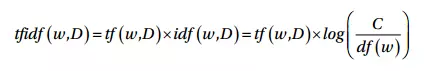

Theo công thức trên, tfidf(w,D) là một score TF-IDF cho từ w trong mẫu D. Thuật ngữ tf(w,D) đại diện cho tần số của từ w xuất hiện trong mẫu D có thể lấy được từ mô hình Bag of words. Thuật ngữ idf(w,D) là tần số nghịch đảo của w có thể tính là log của tổng số mẫu dữ liệu xuất hiện từ w. Mô hình này có thể có rất nhiều biến thể khác nhau, tuy nhiên chúng đều cho kết quả khá giống nhau. Chúng ta cùng xem ví dụ dưới đây.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,and,bacon,beans,beautiful,blue,breakfast,brown,but,dog,eggs,...,love,over,quick,sausages,sky,the,this,toast,today,very
0,0.32,0.00,0.00,0.47,0.41,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.47,0.36,0.00,0.00,0.0,0.0
1,0.27,0.00,0.00,0.39,0.34,0.00,0.00,0.00,0.00,0.00,...,0.45,0.00,0.00,0.00,0.39,0.00,0.54,0.00,0.0,0.0
2,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.30,0.00,...,0.00,0.41,0.30,0.00,0.00,0.46,0.00,0.00,0.0,0.0
3,0.18,0.30,0.35,0.00,0.00,0.35,0.00,0.00,0.00,0.30,...,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.35,0.0,0.0
4,0.23,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,...,0.38,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.0,0.0
5,0.20,0.00,0.00,0.00,0.26,0.00,0.29,0.00,0.29,0.00,...,0.00,0.00,0.29,0.00,0.00,0.45,0.00,0.00,0.0,0.0
6,0.15,0.00,0.00,0.22,0.19,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.43,0.34,0.00,0.00,0.3,0.6
7,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.39,0.28,0.00,...,0.00,0.00,0.28,0.00,0.00,0.44,0.00,0.00,0.0,0.0


Các vector đặc trưng có được từ TF-IDF có thể biển diễn các giá trị tỉ lệ và chuẩn hóa hơn so với các giá trị của mô hình bag of words cơ bản

### 6. Document similarity

Document Similarity (hay độ tương tự của văn bản) là quá trình sử dụng số liệu dựa trên khoảng cách hoặc độ tương tự có thể sử dụng để xác định mức độ tương đương của một văn bản với bất kỳ văn bản nào khác dựa trên các đặc trưng được trích xuất ra từ bag of words hoặc tf-idf.

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.592497,0.167270,0.056604,0.073640,0.541928,0.704836,0.362454
1,0.592497,1.000000,0.000000,0.047703,0.236620,0.142703,0.360920,0.000000
2,0.167270,0.000000,1.000000,0.000000,0.000000,0.645455,0.155793,0.627881
3,0.056604,0.047703,0.000000,1.000000,0.493841,0.035512,0.026360,0.000000
4,0.073640,0.236620,0.000000,0.493841,1.000000,0.046201,0.034294,0.000000
5,0.541928,0.142703,0.645455,0.035512,0.046201,1.000000,0.425888,0.869431
6,0.704836,0.360920,0.155793,0.026360,0.034294,0.425888,1.000000,0.337583
7,0.362454,0.000000,0.627881,0.000000,0.000000,0.869431,0.337583,1.000000


Nhìn vào ma trận độ tương tự (similarity matrix) các bạn có thể thấy rõ ràng rằng các mẫu (0, 1 và 6), (2, 5 và 7) rất giống nhau và các mẫu (3 và 4) hơi giống nhau nhưng cường độ không mạnh lắm. Điều này chỉ ra rằng các mẫu đó một số đặc trưng tương tự nhau. Đây chính là một ví dụ hoàn hảo về việc nhóm hoặc phân cụm văn bản có thể giải quyết được bằng cách học không giám sát (unsupervised learning). Đặc biệt chúng có thể áp dụng xử lý trên khối lượng lớn mẫu văn bản

### 7. Phân cụm tài liệu sử dụng đặc trưng tương tự

Phân cụm (clustering) tận dụng phương pháp học không giám sát để nhóm các điểm dữ liệu (trong trường hợp này là các mẫu văn bản) thành các nhóm hoặc các cụm. Chúng ta sẽ sử dụng thuật toán phân cụm không giám sát để thử nhóm các mẫu văn bản tương tự từ kho văn bản đã có trước đó. Có hai phương pháp phân cụm chính là agglomerative và divisive methods. Ở đây chúng ta sẽ sử dụng phương pháp agglomerative. Đây là phương pháp phâm cụm từ dưới lên trên, tức là mỗi mẫu hoặc tài liệu ban đầu được xếp vào các cụm riêng biệt và được nối với nhau bằng cách sử dụng các thang đo khoảng cách và các tiêu chuẩn để hợp nhất liên kết như mô tả trong hình dưới đây.

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5.0,7.0,0.313327,2.0
1,0.0,6.0,0.494521,2.0
2,3.0,4.0,0.740642,2.0
3,2.0,8.0,0.772872,3.0
4,1.0,9.0,1.084061,3.0
5,11.0,12.0,2.250888,6.0
6,10.0,13.0,2.614378,8.0


### 8. Topic model

Chúng ta cũng có thể sử dụng một số kỹ thuật tổng hợp, tóm tắt để trích xuất các chủ đề hoặc khái niệm đặc trưng của văn bản. Ý tưởng về các topic models xoay quanh quá trình sắp xếp các văn bản vào những dạng chủ đề, khái niệm. Mỗi chủ để được biểu diễn dưới dạng là tập hợp của các từ/thuật ngữ có trong kho văn bản. Nếu chúng xuất hiện cùng với nhau các từ/thuật ngữ này sẽ biểu thị, tượng trưng cho một chủ đề hoặc khái niệm cụ thể. Chúng ta có thể dễ dạng phân biệt các chủ đề với nhau nhờ ngữ nghĩa của các thuật ngữ đó. Tuy nhiên, các chủ đề thường có sự chồng chéo nhất định trên dữ liệu. Các topic models sẽ cực kỳ hữu ích trong việc tóm tắt, rút gọn khối lượng lớn tài liệu, văn bản để trích xuất, mô tả các khái niệm chính nhất. Chúng cũng hữu ích trong việc trích xuất các đặc trưng từ dữ liệu văn bản để nắm bắt các pattern tiềm ẩn trong dữ liệu đó.

Có nhiều kỹ thuật khác nhau để mô hình hóa chủ đề văn bản và hầu hết chúng liên quan đến một số dạng phân tách ma trận. Một số kỹ thuật như Latent Semantic Indexing (LSI) sử dụng các phương pháp phân tách ma trận, cụ thể hơn là phân tách các giá trị đơn lẻ. Chúng ta sẽ sử dụng một kỹ thuật khác là Latent Dirichlet Allocation (LDA), một kỹ thuật sử dụng mô hình xác suất tổng quát trong đó mỗi mẫu tài liệu bao gồm một sự kết hợp của một số chủ đề và mỗi thuật ngữ hoặc từ có thể được gán cho một chủ đề cụ thể. Phương pháp này tương tự như phương pháp pLSI (probabilistic LSI)

Chúng ta sẽ sử dụng các framework như gensim hoặc scikit-learn và áp dụng mô hình LDA để tạo ra các chủ đề.

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.052692,0.048674,0.898634
1,0.048296,0.050509,0.901195
2,0.932469,0.033478,0.034054
3,0.030521,0.938537,0.030942
4,0.042016,0.914360,0.043624
5,0.935380,0.029138,0.035482
6,0.028078,0.025965,0.945957
7,0.937862,0.030404,0.031734


Từ hình trên bạn có thể thấy rõ ràng rằng mẫu dữ liệu nào có tương quan mạnh nhất đến chủ đề tương ứng. Chúng ta có thể xem xét cụ thể các chủ đề và các từ/thuật ngữ chính như sau

In [16]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('the', 6.346499061582944), ('is', 4.33222305953756), ('brown', 3.332659050423624), ('dog', 3.332659050423624), ('fox', 3.332659050423624), ('lazy', 3.332659050423624), ('quick', 3.332659050423624), ('but', 1.3326918739555595), ('jumps', 1.332644807215655), ('over', 1.332644807215655), ('blue', 1.3057675455913016), ('and', 1.2942677444056496)]

[('and', 2.347851105575175), ('bacon', 2.3329322523100195), ('eggs', 2.3329322523100195), ('ham', 2.3329322523100195), ('sausages', 2.3329322523100195), ('love', 1.3389586354123724), ('beans', 1.3329953701369939), ('breakfast', 1.3329953701369939), ('has', 1.3329953701369939), ('kings', 1.3329953701369939), ('toast', 1.3329953701369939), ('green', 1.3328219945603033)]

[('sky', 4.332700330427313), ('blue', 3.3601334715315385), ('and', 3.357881150019149), ('is', 3.3338214972771225), ('beautiful', 3.3326185360131415), ('the', 3.3195407338423517), ('very', 2.3329040291973486), ('today', 1.3328788435358245), ('this', 1.332420388042531), ('love', 1.

Như vậy, chúng ta đã có được ba chủ đề khá khác biệt với nhau dựa trên các từ/thuật ngữ cấu thành chúng. Về cơ bản, chủ đề thứ nhất có thể nói về thời tiết, chủ đề thứ hai nói về thực phẩm và cuối cùng về động vật. Việc chọn ra số lượng chủ đề cũng là một môn khoa học. Có rất nhiều phương pháp và cách thức khác nhau để dự đoán, xác định số lượng chủ đề phù hợp cho từng bài toán.

### Phân cụm văn bản dựa trên Topic models

Các bạn đã xây dựng được topic model dựa trên bag of words và LDA. Bây giờ, chúng ta sẽ tận dụng kết quả trên để phân cụm các mẫu tài liệu trong kho văn bản bằng thuật toán phân cụm không giám sát để thử xem kết quả có giống như những gì làm trước đó với thuật toán phân cụm sử dụng Document Similarity hay không?

Chúng ta sẽ sử dụng một thuật toán phân cụm phổ biến nhất là K-means clustering để phân nhóm các mẫu tài liệu dựa trên các đặc trưng thu được từ topic model ở trên. Trong K-means clustering, tham số k chỉ định số lượng phân nhóm sẽ được tạo ra. Phương pháp phân cụm này dưa trên centroid, nghĩa là thuật toán sẽ cố gắng tạo ra các cụm mà tổng bình phương khoảng cách của các điểm dữ liệu trong cụm đến tâm của cụm đó là nhỏ nhất và phương sai của các cụm bằng nhau.

In [17]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


Như vậy chúng ta đã có được kết quả phân cụm và gán nhãn cho các mẫu văn bản bằng phương pháp topic model

### Các phương pháp nâng cao

Ngoài ra còn một số phương pháp tiên tiến quanh việc xử lý dữ liệu văn bản được phát triển gần đây không được đề cập đến trong bài viết này. Những phương pháp này bao gồm tận dụng các mô hình học sâu để có được các word embeddings (Word2Vec and GloVe).